# Linear Model Generalization

> range of X is -1 to 1

## <mark>Steps</mark>
1. define a problem dataset => (f(x) = x^2)
##### 2. Repeat {
- random 2 values from problem dataset
- use these 2 values to find optimal weights by normal equation
- use these weights to be as a parameter for model with a whole dataset.
- get y_hat from model prediction
- plot it
##### }
3. find the mean of model (mean of E_d)
4. compute bias and variance to get E_out

### ----------- utils -----------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define X data (bias + weigths)
def define_X_include_bias(X):
    X_b = np.c_[np.ones((len(X), 1)), X]
    return X_b

# Normal Equation
def normalEquation(X, y):
    optimized_weights = np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y)) # w = (XT * X)^-1 * (XT * y)
    return optimized_weights

# Linear Regression
def linearRegression(X, W):
    return np.dot(X, W)

def meanModel(models):
    return np.mean(models, axis=0)

### ----------------------------

### step 1: define a problem dataset

In [2]:
# Define the function
def problem(X):
    return np.square(X)

- Visualize it

(100,)
(100, 2)


(-2.0, 2.0)

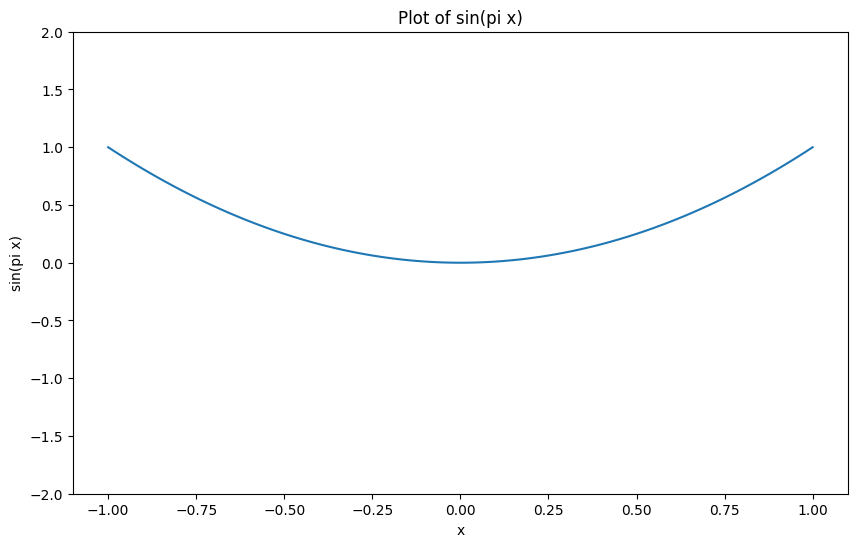

In [3]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Define X data (bias + weigths)
X_include_bias = define_X_include_bias(X)
print(X_include_bias.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

### step 2: prepare before compute E_out
##### Repeat {
- random 2 values from problem dataset
- use these 2 values to find optimal weights by normal equation
- use these weights to be as a parameter for model with a whole dataset.
- get y_hat from model prediction
- plot it
##### }

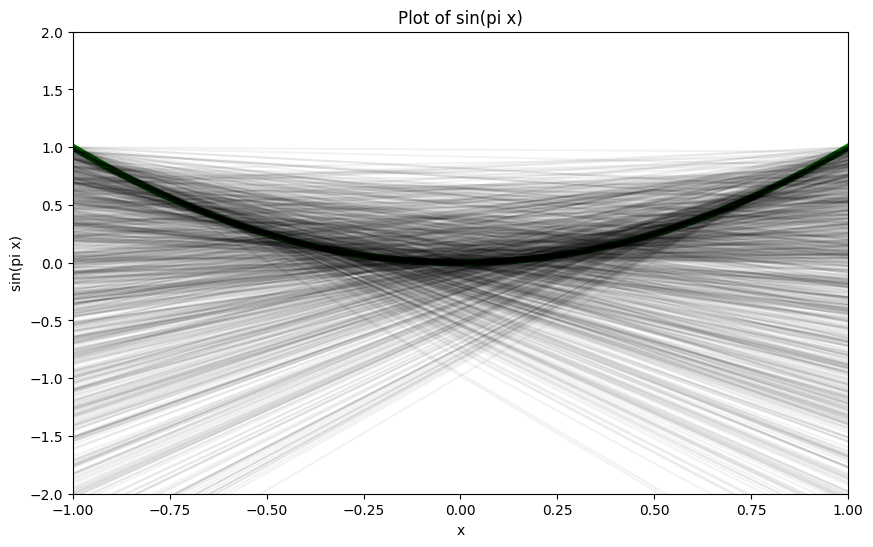

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)', c="green", linewidth=5.0)
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)
plt.xlim(-1, 1)

# every value from dataset that possible
E_d = []

for i in range(1000):
    # random 2 values from problem dataset
    rands_X = np.random.choice(X, 2)
    y_sample = problem(rands_X)

    X_sample = define_X_include_bias(rands_X)
    n = len(rands_X)

    # use these 2 values to find optimal weights by normal equation
    W = normalEquation(X_sample, y_sample)
    
    # use these weights to be as a parameter for model with a whole dataset.
    # get y_hat from model prediction
    y_pred = linearRegression(X=X_include_bias, W=W)
    E_d.append(y_pred)
    
    # plot it
    plt.plot(X, y_pred, c="black", alpha=0.05)     


### step 3: find the mean of model (mean of E_d)

In [5]:
mean_model = meanModel(E_d)
mean_model.shape

(100,)

### step 4: compute bias and variance to get E_out

- bias

In [6]:
# bias^2 = mean of (mean_model - y)^2
z = np.square(mean_model - y)
bias = np.mean(z)
print(f"Bias: {bias:.2f}")

Bias: 0.20


- variance

In [7]:
# variance = mean of (mean of (every value from dataset that possible - mean_model))
z = np.square(E_d - mean_model)
var_x = np.mean(z)
variance = np.mean(var_x)
print(f"Variance: {variance:.2f}")

Variance: 0.32


### step 5: Compute E_out

In [8]:
E_out = bias + variance
print(f"E_out: {E_out:.2f}")

E_out: 0.52


### Result

(1000, 100) (100, 1000) (100,)


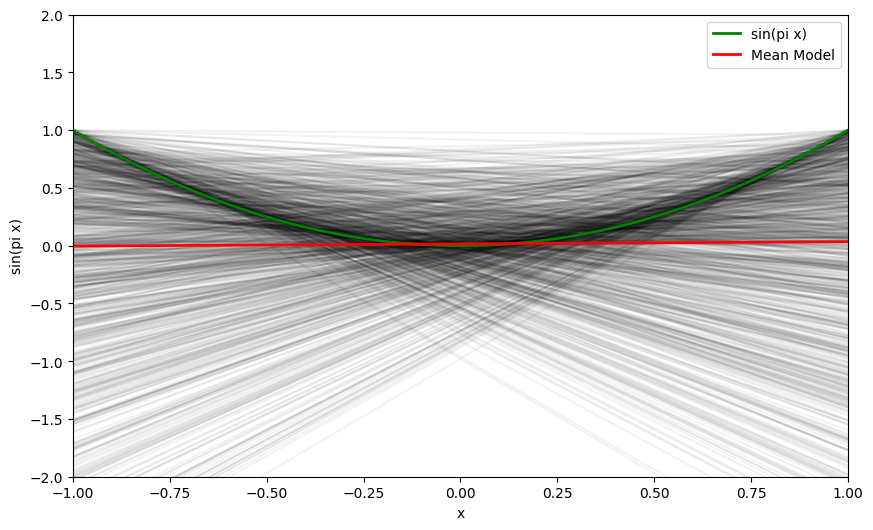

In [9]:
print(np.array(E_d).shape, np.array(E_d).T.shape, X.shape)
plt.figure(figsize=(10, 6))
plt.plot(X, np.array(E_d).T, c="black", alpha=0.05)
plt.plot(X, y, label='sin(pi x)', c="green", linewidth=2.0)
plt.plot(X, mean_model, label='Mean Model', c="red", linewidth=2.0)
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)
plt.xlim(-1, 1)
plt.legend()
plt.show()